<h1> Résolution numérique des équations différentielles et le retour d’Apollo 13</h1>

Jeanne THOMAS, L3, mathématiques

# 1) Orbite géostationnaire

## Calcul de la vitesse et de l'altitude d'un satellite géostationnaire

Données :

- Masse de la Terre : $M = 5.97 \times 10^{24}kg$

- Rayon de la Terre : $R_T = 6.378 \times 10^6m$

- Période de révolution : $T = 86 000s$

- Constante gravitationelle :
  $G = 6.67 \times 10^{-11} m^3.kg^{-1}.s^{-2}$

- Masse de la Lune : $M_L = 7,35 \times 10^{22}kg$

- Rayon de la lune : $R_L = 1.74\times 10^6m$

- Distance de la lune : $D_L = 400.5 \times 10^6m$

- Période de la lune : $T_L = 27,3\times 86\,000 s$

- Angle initial de la lune : $A = -\frac{61\times \pi}{180}rad$

- distance satellite Terre : $r$

- vitesse satellite : $v$

Afin de calculer la hauteur et la vitesse d'un satellite géostationnaire de la terre, on utilise la deuxième loi de Kepler appliquée aux satelites en orbite circulaire: $$T^2 = \frac{4\pi ^2r^3}{GM_T}$$ On obtiens alors : $$r  = \bigg(\frac{MGT^2}{4\pi^2}\bigg)^{\frac{1}{3}}$$

De plus le mouvement est uniforme et circulaire donc :
$$v = \frac{2\pi r}{T} $$ 
Enfin les équations du mouvements nous donne les équations
différentielles suivantes : $$v' = f_v(t,v) = a(t)$$
$$x' = f_p(t,x) = v(t)$$ On applique alors la méthode d'euler aux
fonctions $f_p$ et $f_v$

## Initialisation des constantes

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
G = 6.67 * math.pow(10,-11)
Masse_terre = 5.97 * math.pow(10,24) 
Periode_terre = 24*3600
hauteur = 42226910

Masse_lune=7.35 * math.pow(10, 22)
rayon_lune = 1.74 * math.pow(10,6)
rayon_terre = 6.378 * math.pow(10,6)
distance_terre_lune = 4.005 * math.pow(10,8)
angle_initial_terre_lune = math.pi/180 * -61
periode_de_revolution_lune = 27.3 * 24.0 * 3600
h= 0.1
X_0 = np.array([math.pow((Masse_terre * G * Periode_terre**2)/(4*math.pi**2),1/3) , 0])
V_0 = np.array([0, 2*math.pi*X_0[0]/Periode_terre])

## Méthode d'Euler

### Algorithme d'Euler

In [4]:
position_euler = [X_0]
vitesse_euler = [V_0]
time = Periode_terre
# on définit la fonction pour l'équation différentielle de la vitesse
def f_v(t, x):
    return x * -G*(Masse_terre)/np.linalg.norm(x)**3
# on définit la fonction pour l'équation différentielle de la position
def f_p(t, v):
    return v

temps = 0
etape = 0
# on applique la méthode d'euler jusqu'à dépasser un seuil de temps
while (temps <= time):
    vitesse_euler.append(vitesse_euler[etape] + h* f_v(temps, position_euler[etape]))
    position_euler.append(position_euler[etape] + h*f_p(temps, vitesse_euler[etape]))
    etape+=1
    temps+=h
    
# on calcule l'écart entre la position initiale et la position après 24h approchée par Euler
erreur_euler =np.linalg.norm(position_euler[-1]-position_euler[0]) 

print(f"La distance entre la position finale et la position initiale est égale à {erreur_euler}")

La distance entre la position finale et la position initiale est égale à 18588.3903986405


### Représentation graphique d'Euler

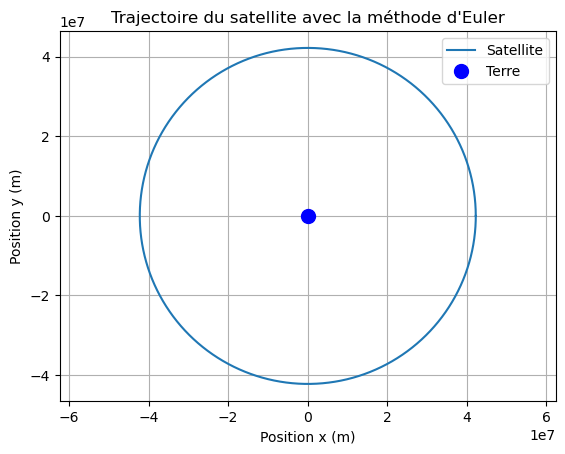

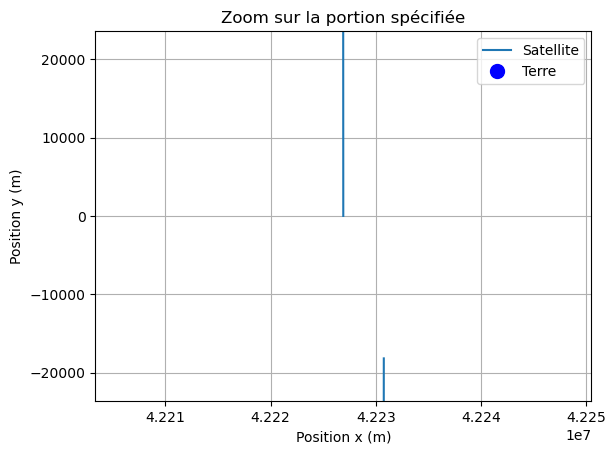

In [5]:
# Extraction des coordonnées x et y pour la trajectoire d'Euler
x_coords = [pos[0] for pos in position_euler]
y_coords = [pos[1] for pos in position_euler]

# Tracé de la trajectoire
plt.plot(x_coords, y_coords, label="Satellite")

# Ajout du point de la Terre pour le contexte
plt.plot(0, 0, 'bo', markersize=10, label="Terre")

# Ajout des labels et de la légende
plt.xlabel("Position x (m)")
plt.ylabel("Position y (m)")
plt.title("Trajectoire du satellite avec la méthode d'Euler")
plt.legend()

# Affichage du graphique
plt.grid()
plt.axis('equal')
plt.show()

# Zoom sur la portion spécifiée pour observer les erreurs d'approximation
plt.plot(x_coords, y_coords, label="Satellite")
plt.plot(0, 0, 'bo', markersize=10, label="Terre")

# Calcul de la distance entre le premier et le dernier point
distance = np.linalg.norm(np.array([x_coords[0], y_coords[0]]) - np.array([x_coords[-1], y_coords[-1]]))

plt.xlabel("Position x (m)")
plt.ylabel("Position y (m)")
plt.title("Zoom sur la portion spécifiée")
plt.xlim(-distance-5000+x_coords[0], distance+5000+x_coords[0])
plt.ylim(-distance-5000+y_coords[0], distance+5000+y_coords[0])
plt.legend()
plt.grid()
plt.show()

# 2) Méthode adaptative de Heun

## Méthode de Heun - Satellite géostationnaire

### Algorithme de Heun

In [6]:
position_heun=[X_0]
vitesse_heun=[V_0]
position_euler = [X_0]
vitesse_euler = [V_0]
time = Periode_terre

def f_v(t, x):
    return x * -G*(Masse_terre)/np.linalg.norm(x)**3
 
def f_p(t, v):
    return v

temps = 0
etape = 0
    
while (temps <= time):
    #on effectue la méthode d'Euler pour pouvoir comparer
    vitesse_euler.append(vitesse_euler[etape] + h* f_v(temps, position_euler[etape])) 
    position_euler.append(position_euler[etape] + h*f_p(temps, vitesse_euler[etape]))

    # methode de heun sur la vitesse
    k0 = f_p(temps, vitesse_heun[etape])
    # on calcule la prévision
    position_predite =(position_heun[etape] + h * k0)
    # on calcul la pente sur l'étape n-1
    k= f_v(temps, position_heun[etape])
    # on calcul la pente sur la prévision
    l= f_v(temps, position_predite)
    # on ajoute la moyenne des pentes pondérées par le pas de temps
    vitesse_heun.append(vitesse_heun[etape]+ h*0.5*(k+l))

    # methode de heun sur la position
    vitesse_predite = vitesse_heun[etape]+ h * k
    k= f_p(temps, vitesse_heun[etape])
    l= f_p(temps, vitesse_predite)
    
    position_heun.append(position_heun[etape]+ h*0.5*(k+l))
    
    etape+=1
    temps+=h
    
erreur_euler = np.linalg.norm(position_euler[-1]-X_0)
erreur_heun =np.linalg.norm(position_heun[-1]-X_0)

print(f"La distance entre la position finale et la position initiale est égale à {erreur_euler}")
print(f"La distance entre la position finale et la position initiale est égale à {erreur_heun}")


La distance entre la position finale et la position initiale est égale à 18588.3903986405
La distance entre la position finale et la position initiale est égale à 0.018708072910685512


### Representation graphique de Heun - Satellite géostationnaire

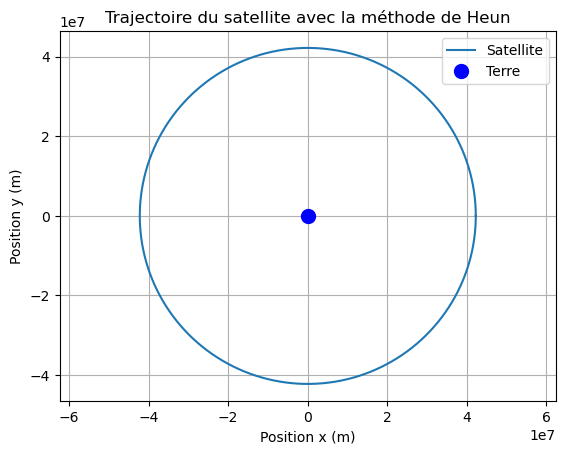

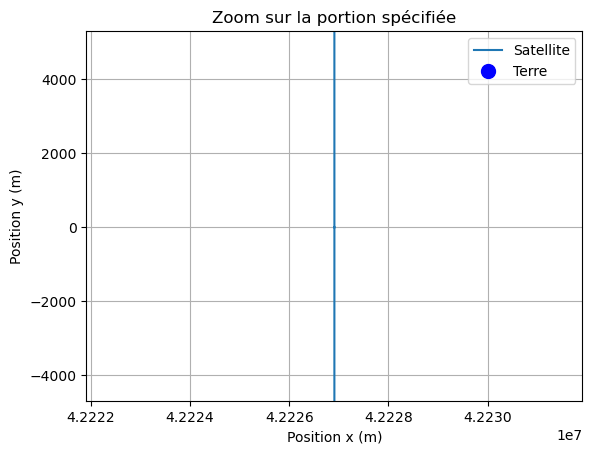

In [7]:
# Extraction des coordonnées x et y pour la trajectoire d'Euler
x_coords = [pos[0] for pos in position_heun]
y_coords = [pos[1] for pos in position_heun]

# Tracé de la trajectoire
plt.plot(x_coords, y_coords, label="Satellite")

# Ajout de la Terre pour le contexte
plt.plot(0, 0, 'bo', markersize=10, label="Terre")

# Ajout des labels et de la légende
plt.xlabel("Position x (m)")
plt.ylabel("Position y (m)")
plt.title("Trajectoire du satellite avec la méthode de Heun")
plt.legend()

# Affichage du graphique
plt.grid()
plt.axis('equal')
plt.show()

# Zoom sur la portion spécifiée pour observer les erreurs d'approximation
plt.plot(x_coords, y_coords, label="Satellite")
plt.plot(0, 0, 'bo', markersize=10, label="Terre")

# Calcul de la distance entre le premier et le dernier point
distance = np.linalg.norm(np.array([x_coords[0], y_coords[0]]) - np.array([x_coords[-1], y_coords[-1]]))

plt.xlabel("Position x (m)")
plt.ylabel("Position y (m)")
plt.title("Zoom sur la portion spécifiée")
plt.xlim(-distance-5000+x_coords[0], distance+5000+x_coords[0])
plt.ylim(-distance-5000+y_coords[1], distance+5000+y_coords[1])
plt.legend()
plt.grid()
plt.show()

### Comparaison des méthodes

On constate que l'erreur d'approximation d'Euler est d'un facteur 100
fois supérieur à l'erreur d'approximation de Heun pour un pas de temps de 0.1.

## Méthode de Heun - pas adaptif  

### Conditions initiales et fonction Heun

In [8]:
X_0 = np.array([15 * math.pow(10,6), 1 * math.pow(10,6)]) # on met a jour les nouvelles conditions initiales
V_0 = np.array([2 * math.pow(10,3), 4* math.pow(10,3)])  
def f_v(t, x):
    return x * -G*(Masse_terre)/np.linalg.norm(x)**3
 
def f_p(t, v):
    return v

time = 13200
temps = 0
etape = 0
# la tolérance est la valeur vers laquelle on va faire converger l'erreur de troncature local
tol = 1 

def Heun_method_adaptative_step(fv, fp, temps_total, tol, h, position_origine, vitesse_origine):
    position_heun=[position_origine]
    vitesse_heun=[vitesse_origine]
    temps = 0
    etape = 0
    while (temps <= temps_total):
        #Euler prediction
        vitesse_predite_euler = vitesse_heun[etape] + h* fv(temps, position_heun[etape])
        position_predite_euler = position_heun[etape] + h*fp(temps, vitesse_heun[etape])
        
        # Heun pour la vitesse
        vitesse_heun.append(vitesse_heun[etape]+ h*0.5*(fv(temps, position_heun[etape])+fv(temps, position_predite_euler)))
        # Heun pour la position
        position_heun.append(position_heun[etape]+ h*0.5*(fp(temps, vitesse_heun[etape])+fp(temps, vitesse_predite_euler)))
        
        etape+=1
        temps+=h
        
        # On calcule l'erreur de troncature local
        erreur_troncature = np.linalg.norm(position_predite_euler-position_heun[etape]) + temps * np.linalg.norm(vitesse_predite_euler-vitesse_heun[etape])

        # On adapte le pas de temps
        h *= math.sqrt(tol/erreur_troncature)
    return (position_heun, vitesse_heun)

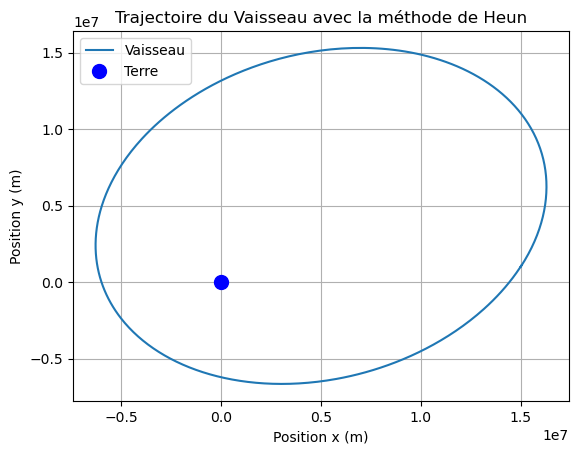

In [9]:
position_vaisseau = Heun_method_adaptative_step(f_v, f_p, time,10000, h, X_0, V_0)[0]

# Extraction des coordonnées x et y pour la trajectoire d'Euler
x_coords = [pos[0] for pos in position_vaisseau]
y_coords = [pos[1] for pos in position_vaisseau]

# Tracé de la trajectoire
plt.plot(x_coords, y_coords, label="Vaisseau")

# Ajout de la Terre pour le contexte
plt.plot(0, 0, 'bo', markersize=10, label="Terre")

# Ajout des labels et de la légende
plt.xlabel("Position x (m)")
plt.ylabel("Position y (m)")
plt.title("Trajectoire du Vaisseau avec la méthode de Heun")
plt.legend()

# Affichage du graphique
plt.grid()
plt.show()

# 3) Retour d’Apollo 13

## Calcul de la position de la Lune et du vecteur accélération du vaisseau

a) On connait le temps total pour que la lune fasse un tour autour de la terre, on obtient donc facilement l'angle en fonction du temps grâce à une simple 4ème proportionelle.

b) La seconde loi de newton nous donne dans le système Terre, Vaisseau,
Lune la formule suivante pour l'accélération du vaisseau :
$$\vec{a}_{Vaisseau} = G(\frac{M_T}{D_{VaisseauTerre}^2}\vec{i} + \frac{M_L}{D_{VaisseauLune}^2}\vec{j})$$
Avec $\vec{i}, \vec{j}$ les vecteurs unitaires pointant respectivement
du vaisseau vers la Terre, et du vaisseau vers la Lune. Et $D_{ab}$ la
distance entre a et b.

## Définition des équations différentielles

In [10]:
X_0 = np.array([-6.701 * math.pow(10,6), 0])
V_0 = np.array([0,-10.818* math.pow(10,3)])
time = periode_de_revolution_lune

def f_v_vaisseau(t, x):
     # le vecteur unitaire du vaisseau vers la lune s'écrit bien x-l et il pointe vers le vaisseau donc il est dirigé contre la force de gravitation on rajoute donc un moins
    return (-G * Masse_terre / (np.linalg.norm(x)**3)) * x + (-G * Masse_lune / (np.linalg.norm(x-position_lune(t))**3)) * (x-position_lune(t))
    
def f_p_vaisseau(t, v):
    return v

def position_lune(t): 
    # On connait la période de révolution de la lune et son angle de départ, on peut alors calculer son angle en
    # fonction du temps : 
    angle = angle_initial_terre_lune + 2*t*math.pi/periode_de_revolution_lune
    # On utilise le changement de variable x = rcos(angle), y = rsin(angle)
    return np.array([np.cos(angle), np.sin(angle)])*distance_terre_lune

## Definition de la fonction pour calculer la trajectoire

In [11]:
def trajectoire(second_boost):
    h = 1
    temps = 0
    etape = 0
    while (temps <= time):
        # prevision par la méthode d'Euler
        vitesse_euler_predite = vitesse_vaisseau[etape] + h* f_v_vaisseau(temps, position_vaisseau[etape])
        position_euler_predite = position_vaisseau[etape] + h*f_p_vaisseau(temps, vitesse_vaisseau[etape])
        position_lune_list.append(position_lune(temps))
        # on stock la valeur sans boost de la vitesse au cas ou l'on n'applique aucun boost
        vitesse = vitesse_vaisseau[etape]+ h*0.5*(f_v_vaisseau(temps, position_vaisseau[etape])+f_v_vaisseau(temps+h, position_euler_predite))
        if(temps>=101104 and temps<101104+h): # on applique le premier boost
            vitesse += (vitesse / np.linalg.norm(vitesse)) * -7.04
        if(temps>=212100 and temps<212100+h): # on applique le second boost
            vitesse += (vitesse / np.linalg.norm(vitesse)) * (second_boost)
        vitesse_vaisseau.append(vitesse)
        position_vaisseau.append(position_vaisseau[etape]+ h*0.5*(f_p_vaisseau(temps, vitesse_vaisseau[etape])+f_p_vaisseau(temps, vitesse_euler_predite)))

        temps+=h
        etape+=1
        erreur_troncature = np.linalg.norm(position_vaisseau[etape - 1]-position_vaisseau[etape]) + h * np.linalg.norm(vitesse_vaisseau[etape - 1]-vitesse_vaisseau[etape])
        h*= math.sqrt(tol/erreur_troncature)
        
        if(np.linalg.norm(position_vaisseau[etape]) <= rayon_terre):
            return True
    return False

## Test pour chaque chaque boost

Malheureusement, pour un boost de -10, le vaisseau ne rentrera jamais chez lui.


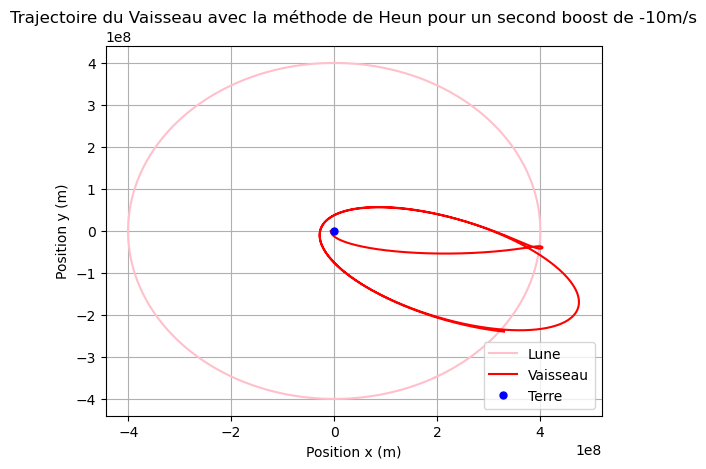

Malheureusement, pour un boost de 0, le vaisseau ne rentrera jamais chez lui.


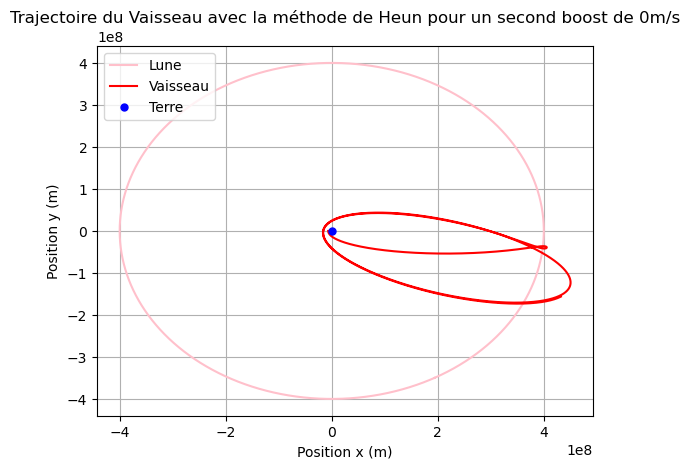

Malheureusement, pour un boost de 10, le vaisseau ne rentrera jamais chez lui.


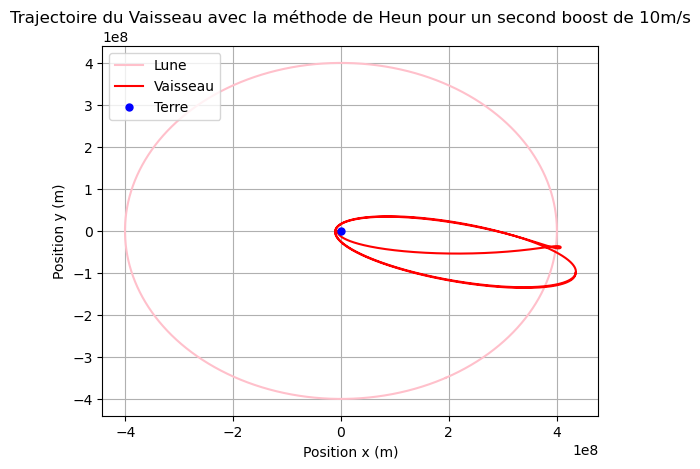

Le vaisseau est revenue sur terre pour un boost de 50 !


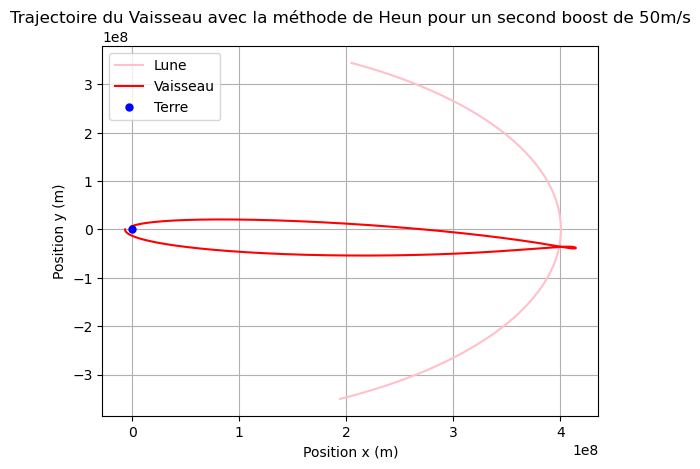

Le vaisseau est revenue sur terre pour un boost de 100 !


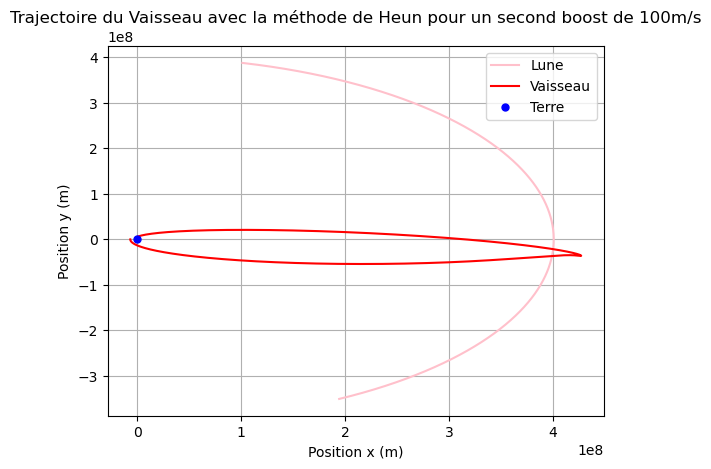

In [13]:
# on test chaque boost pour vérifier lesquelles fonctionnent
for boost in [-10,0,10,50,100]:
    tol = 10000
    position_vaisseau=[X_0]
    vitesse_vaisseau=[V_0]
    position_lune_list= []
    resultat = trajectoire(boost)
    if resultat: 
        print(f"Le vaisseau est revenue sur terre pour un boost de {boost} !")
    else :
        print(f"Malheureusement, pour un boost de {boost}, le vaisseau ne rentrera jamais chez lui.")
    # Extraction des coordonnées x et y pour la trajectoire d'Euler
    x_coords = [pos[0] for pos in position_lune_list]
    y_coords = [pos[1] for pos in position_lune_list]

    x_v_coords = [pos[0] for pos in position_vaisseau]
    y_v_coords = [pos[1] for pos in position_vaisseau]
    # Tracé de la trajectoire
    plt.plot(x_coords, y_coords, label="Lune", color='pink')
    plt.plot(x_v_coords, y_v_coords, color='r', label="Vaisseau")
    # Ajout de la Terre pour le contexte
    plt.plot(0, 0, 'bo', markersize=5, label="Terre")

    # Ajout des labels et de la légende
    plt.xlabel("Position x (m)")
    plt.ylabel("Position y (m)")
    plt.title(f"Trajectoire du Vaisseau avec la méthode de Heun pour un second boost de {boost}m/s")
    plt.legend()

    # Affichage du graphique
    plt.grid()
    plt.show()